In [3]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn import preprocessing
from scipy.stats import multivariate_normal
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Qn 1

In [19]:
brunhild = pd.read_csv('brunhild.txt', sep='\t')

In [39]:

X = np.log(brunhild['Sulfate'])
y = np.log(brunhild['Hours'])



In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X.values.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

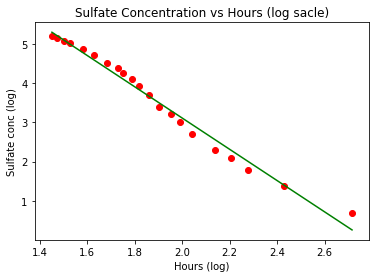

In [48]:
plt.scatter(X, y, color = "red")
plt.plot(X, lr.predict(X.values.reshape(-1,1)), color = "green")
plt.title("Sulfate Concentration vs Hours (log sacle)")
plt.xlabel("Hours (log)")
plt.ylabel("Sulfate conc (log)")
plt.show()

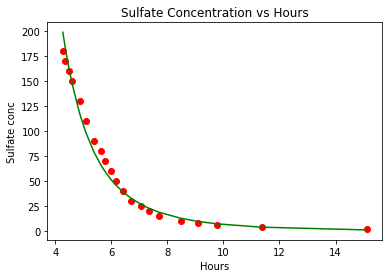

In [49]:
plt.scatter(brunhild['Sulfate'], brunhild['Hours'], color = "red")
plt.plot(brunhild['Sulfate'], np.exp(lr.predict(X.values.reshape(-1,1))), color = "green")
plt.title("Sulfate Concentration vs Hours")
plt.xlabel("Hours")
plt.ylabel("Sulfate conc")
plt.show()

Text(0, 0.5, 'Residual')

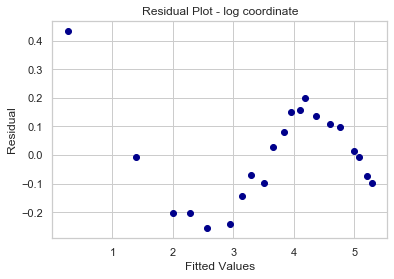

In [63]:
y_predicted = lr.predict(X.values.reshape(-1,1))
residuals = y-y_predicted
plt.plot(y_predicted,residuals, 'o', color='darkblue')
plt.title("Residual Plot - log coordinate")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")

Text(0, 0.5, 'Residual')

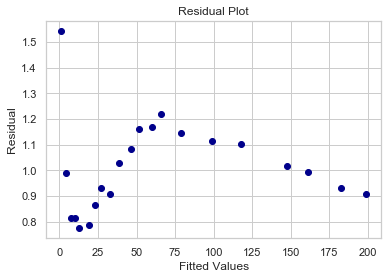

In [62]:
y_predicted = lr.predict(X.values.reshape(-1,1))
residuals = y-y_predicted
plt.plot(np.exp(y_predicted),np.exp(residuals), 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")

# Qn 2